In [ ]:
# Testing the log_mix version 
### E Flynn
### 10/25/17

In [1]:
source("project_utils.R")
set.seed(1025)

# Simulate data
N <- 1000 # number of samples
p <- c(0.65, 0.35) # fraction in each component (null, non-null)
S <- matrix(c(0.0012,0.0005, 0.0005, 0.0010),2,2)
cov.data.M1.sim <- model1Sim(N, p, S)


Loading required package: MASS
Loading required package: Matrix
Loading required package: mnormt


2 x 2 Matrix of class "dpoMatrix"
       [,1]  [,2]
[1,] 0.0012 5e-04
[2,] 0.0005 1e-03


In [4]:
start.time <- Sys.time()
# run stan to estimate the covariance
options(warn=-1)
fit1_sim_a <- stan(
  file = "../models/model1_log_mix.stan",  # log_mix version
  data = cov.data.M1.sim,    
  chains = 4,             
  warmup = 300,          
  iter = 500,           
  cores = 2,              
  refresh = 100         
  )
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

In file included from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/BH/include/boost/config.hpp:39:0,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/BH/include/boost/math/tools/config.hpp:13,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math.hpp:4,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from filea7b6310e2a46.cpp:8:
/home/erflynn/R/x86_64-

Time difference of 3.499513 mins

Inference for Stan model: model1_v2.
4 chains, each with iter=500; warmup=300; thin=1; 
post-warmup draws per chain=200, total post-warmup draws=800.

                    mean se_mean      sd       2.5%        50%      97.5% n_eff
Sigma[1,1]       0.00101 0.00000 0.00013    0.00079    0.00101    0.00127   739
Sigma[1,2]       0.00033 0.00000 0.00008    0.00017    0.00032    0.00050   654
Sigma[2,1]       0.00033 0.00000 0.00008    0.00017    0.00032    0.00050   654
Sigma[2,2]       0.00098 0.00001 0.00013    0.00076    0.00097    0.00123   531
pi[1]            0.66631 0.00119 0.02786    0.61318    0.66671    0.72174   547
pi[2]            0.33369 0.00119 0.02786    0.27826    0.33329    0.38682   547
Omegacor[1,1]    1.00000 0.00000 0.00000    1.00000    1.00000    1.00000   800
Omegacor[1,2]    0.32629 0.00256 0.07234    0.17934    0.32830    0.46354   800
Omegacor[2,1]    0.32629 0.00256 0.07234    0.17934    0.32830    0.46354   800
Omegacor[2,2]    1.00000 0.00000 0.00000    1.000

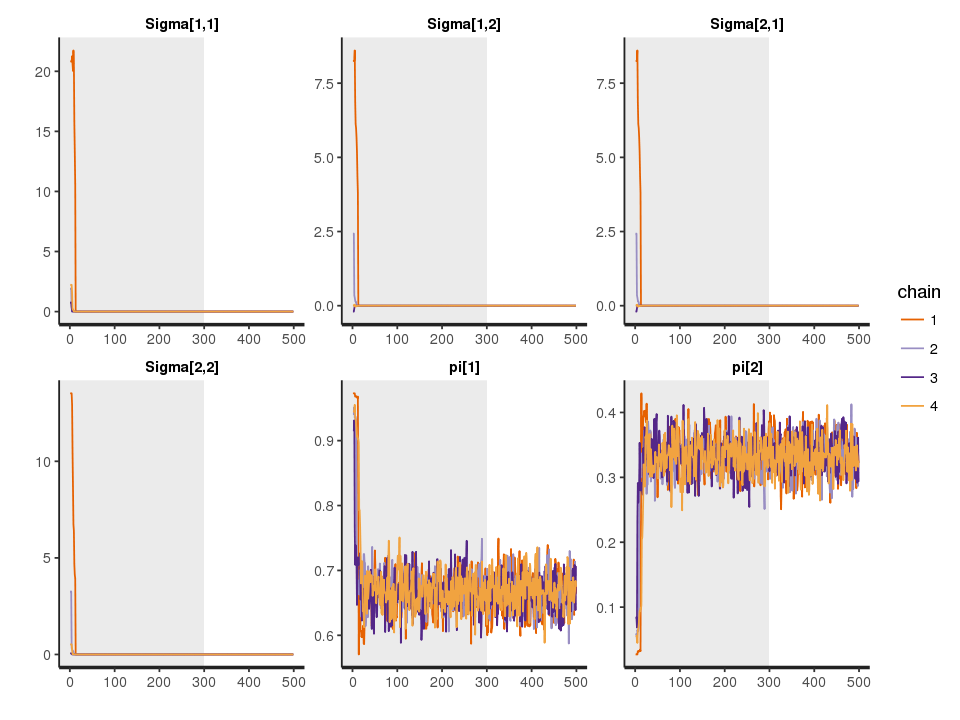

In [6]:
print(fit1_sim_a, pars=c("Sigma", "pi", "Omegacor", "lp__"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit1_sim_a, pars = c("Sigma", "pi"), inc_warmup = TRUE, nrow = 2)

In [7]:
start.time <- Sys.time()
# run stan to estimate the covariance
options(warn=-1)
fit1_sim <- stan(
  file = "../models/model1_loglik.stan",  # standard model 1 code
  data = cov.data.M1.sim,   
  chains = 4,             
  warmup = 300,          
  iter = 500,            
  cores = 2,              
  refresh = 100          
  )
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

In file included from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/BH/include/boost/config.hpp:39:0,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/BH/include/boost/math/tools/config.hpp:13,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/stan/math.hpp:4,
                 from /home/erflynn/R/x86_64-pc-linux-gnu-library/3.3/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from filea7b661b8c6ea.cpp:8:
/home/erflynn/R/x86_64-

Time difference of 2.249653 mins

Inference for Stan model: model1_loglik.
4 chains, each with iter=500; warmup=300; thin=1; 
post-warmup draws per chain=200, total post-warmup draws=800.

                    mean se_mean      sd       2.5%        50%      97.5% n_eff
Sigma[1,1]       0.00102 0.00000 0.00013    0.00079    0.00102    0.00131   747
Sigma[1,2]       0.00033 0.00000 0.00009    0.00016    0.00032    0.00050   631
Sigma[2,1]       0.00033 0.00000 0.00009    0.00016    0.00032    0.00050   631
Sigma[2,2]       0.00099 0.00001 0.00013    0.00077    0.00098    0.00125   559
pi[1]            0.66582 0.00116 0.02826    0.60637    0.66743    0.72115   593
pi[2]            0.33418 0.00116 0.02826    0.27885    0.33257    0.39363   593
Omegacor[1,1]    1.00000 0.00000 0.00000    1.00000    1.00000    1.00000   800
Omegacor[1,2]    0.32621 0.00289 0.07428    0.17371    0.33098    0.45840   660
Omegacor[2,1]    0.32621 0.00289 0.07428    0.17371    0.33098    0.45840   660
Omegacor[2,2]    1.00000 0.00000 0.00000    1

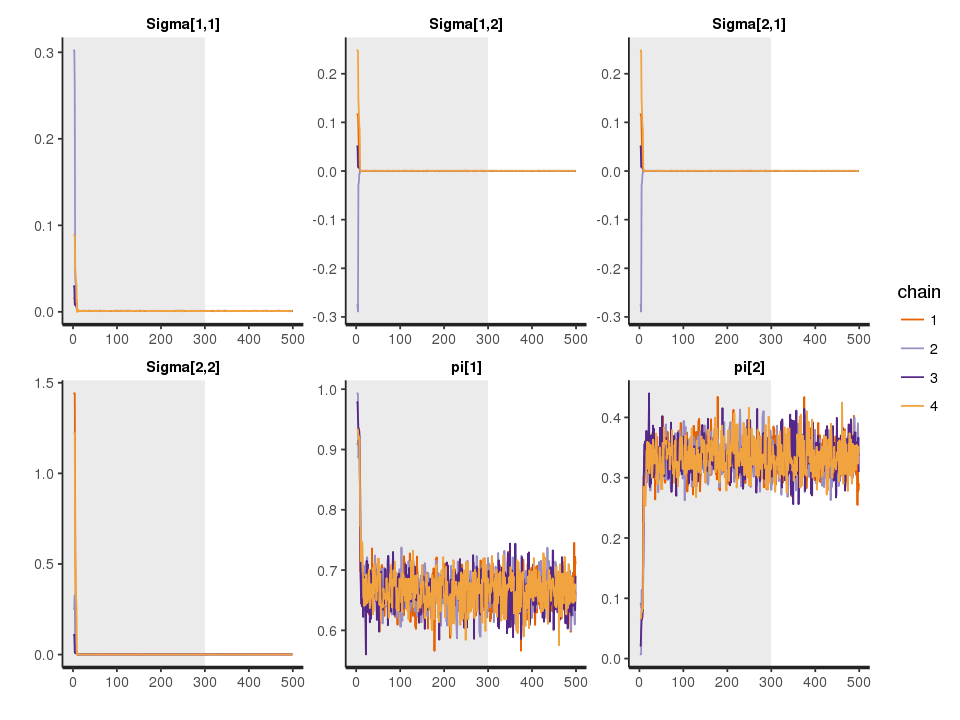

In [8]:
print(fit1_sim, pars=c("Sigma", "pi", "Omegacor", "lp__"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit1_sim, pars = c("Sigma", "pi"), inc_warmup = TRUE, nrow = 2)